# Visualizing Time Series in Pandas.

###### In this Notebook, we'll be looking at some \ways we can visualize our data in order to get some better ideas about the basic trends and relationships we're dealing with before going further.

In [1]:
#We begin by importing the modules we will be using 
import pandas as pd

from collection_selection_and_formatting import collection_selection_and_formatting

###### So we've modified our python code slightly so that we choose the MongoDB collection by its number and then give it a name. For example:

Which record would you like to load?

###### In this example I will enter '306' without quotes to indicate that I want to load the collection with the name 'record_306'. We will then be asked:

What would you like to name your column of values?

###### Because 'rcord_306' corresponds to Exterior Temperature, I will enter 'External_Temp' without quotes. It's essential not to use any spaces when naming our DataFrame columns.

In [2]:
df = collection_selection_and_formatting()

Which record would you like to load? 306
What would you like to name your column of values? External_Temp


###### So here we can see that we've created a DataFrame and it's all wondefully cleaned up and formatted for us

In [10]:
df.tail(50)

,External_Temp
time,
2019-07-25 16:09:50.643000+02:00,41.976670
2019-07-25 16:15:40.135000+02:00,41.884030
2019-07-25 16:21:30.123000+02:00,41.930347
2019-07-25 16:27:20.114000+02:00,41.860870
2019-07-25 16:33:10.107000+02:00,41.756650
2019-07-25 16:39:00.095000+02:00,41.733494
2019-07-25 16:44:50.185000+02:00,41.640854
2019-07-25 16:50:40.176000+02:00,41.501896
2019-07-25 16:56:30.166000+02:00,41.443996


###### Now we're going to create a few different DataFrames that correspond to some of the divisions of time we looked at in the last Notebook. In this example those are:

###### 'df_day' which contains only temperature readings between 8:00 and 19:00 for the entire dataset
###### 'df_night' which contains only temperature readings between 19:00 and 8:00 for the entire dataset
###### 'df_one_day' which contains only temperature readings from April 29th, 2019
###### 'df_one_month' which contains only temperature readings from April, 2019
###### 'df_days_slice' which contains only temperature readings from May 22nd to May 29th, 2019
###### 'df_hour_slice' which contains only temperature readings from 12:00 to 13:00 on May 25th, 2019


In [4]:
df_day = df.between_time('08:00:00', '19:00:00')
df_night = df.between_time('19:00:00', '08:00:00')
df_one_day = df.loc['2019-04-29']
df_one_month = df.loc['2019-04']
df_days_slice = df.loc['2019-05-22':'2019-05-29']
df_hour_slice = df.loc['2019-05-25 12:00:00':'2019-05-25 13:00:00']


###### So now we import Matplotlib and Seaborn to help us visualize our data. We set the figure size (width and height) for Seaborn to something appropriate for our Time Series. 

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sns.set(rc={'figure.figsize':(14, 6)})

###### Here is our basic plotting method. The line width can be changed however we like. We add 'plt.show()' to avoid showing te output as it looks a little cleaner.

###### Immediately, we see that we have some chunks of missing data around mid-to-late May 2019. The plot will automatically draw a straight line between known data. We can examine some techniques for deaing wth this missing data in another Notebook.

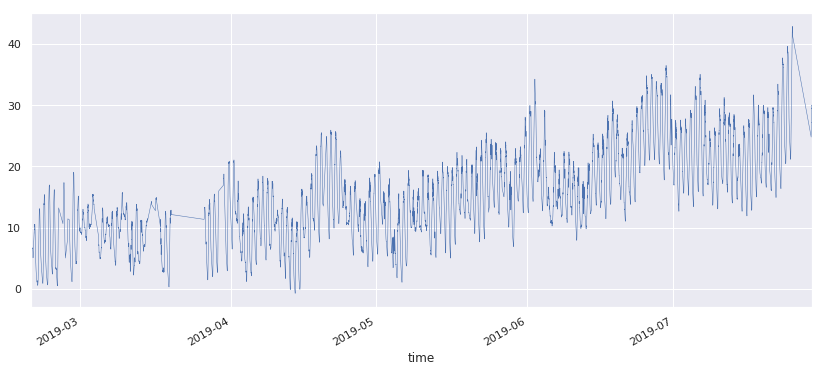

In [8]:
df['External_Temp'].plot(linewidth=0.5)

plt.show()

###### The default color is blue, but we can add an argument if we prefer something else.

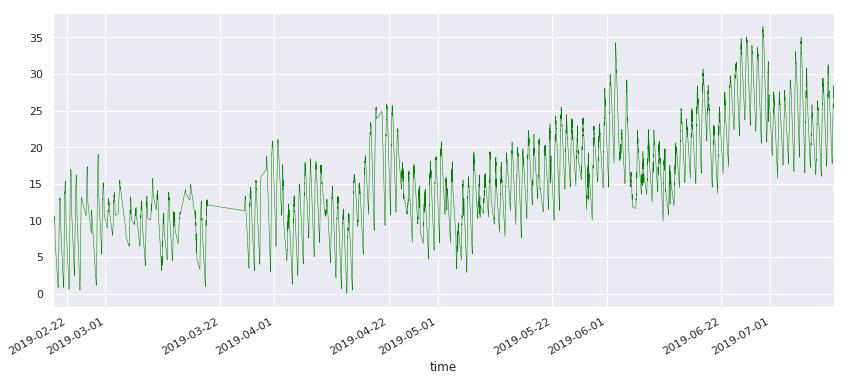

In [8]:
df_day['External_Temp'].plot(linewidth=0.5, color='green')

plt.show()

###### We can also change the linestyle in the plotting arguments and choose from 'dotted', 'solid', or 'dashed'.

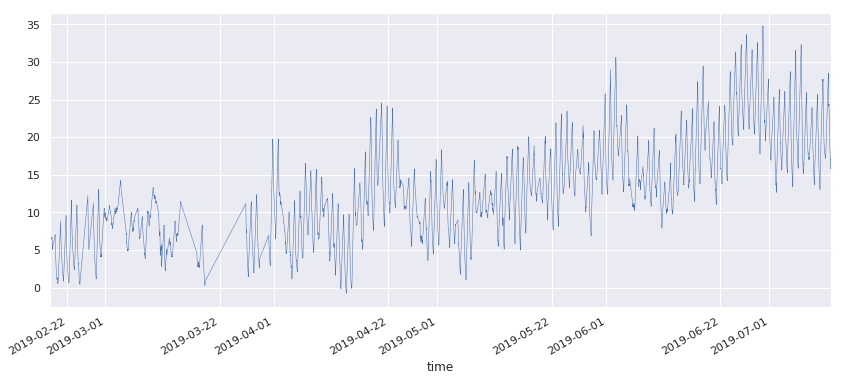

In [9]:
df_night['External_Temp'].plot(linewidth=0.5)

plt.show()

###### We can also change the linestyle in the plotting arguments and choose from 'dotted', 'solid', or 'dashed'.

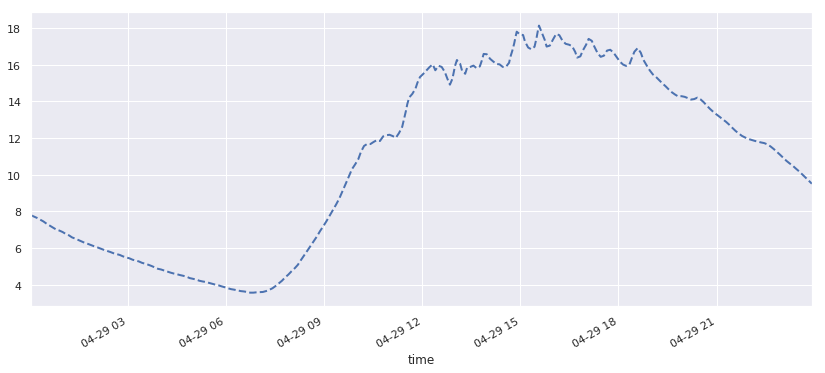

In [10]:
df_one_day['External_Temp'].plot(linestyle='dashed', linewidth=2)

plt.show()

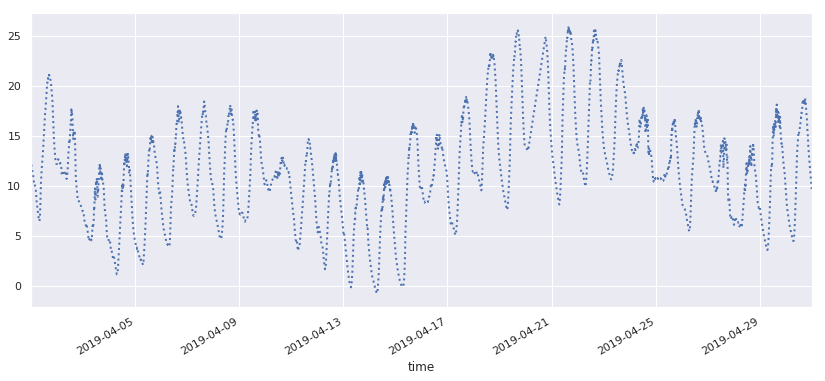

In [11]:
df_one_month['External_Temp'].plot(linewidth=2, linestyle='dotted')

plt.show()

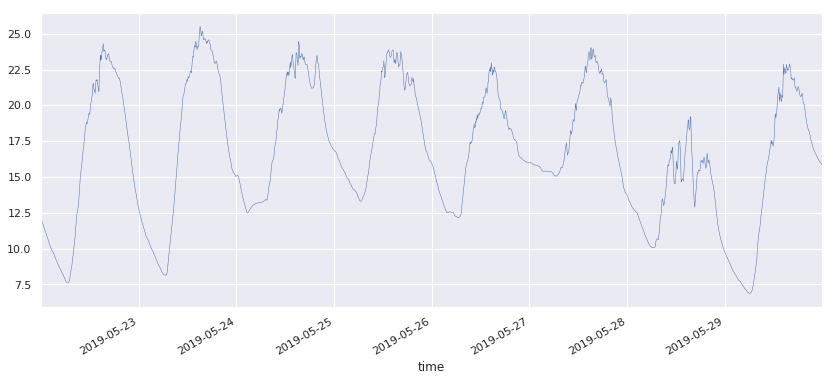

In [12]:
df_days_slice['External_Temp'].plot(linewidth=0.5)

plt.show()

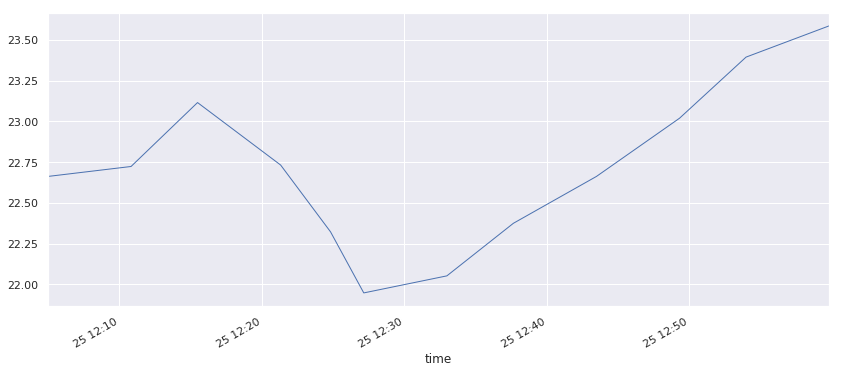

In [13]:
df_hour_slice['External_Temp'].plot(linewidth=1)

plt.show()

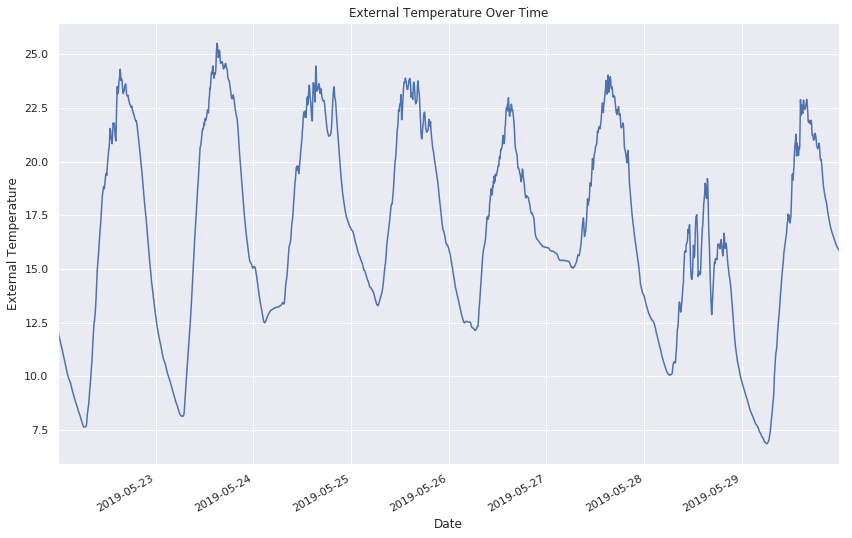

In [14]:
axes = df_days_slice['External_Temp'].plot(linestyle='solid', alpha=1, figsize=(14, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('External Temperature')
    ax.set_xlabel('Date')
    ax.set_title('External Temperature Over Time')

###### Okay, let's say we want to have a preliminary view of how two sets of data compare to each other visually. First we will create another DataFrame, in this case of the temperature inside the building, so record_935. We will immediately turn it into a DataFrame with one day of data to compare it to the same day in the outside temperature data.

In [15]:
df1 = collection_selection_and_formatting()
df1 = df1.loc['2019-04-29']

Which record would you like to load? 935
What would you like to name your column of values? Internal_Temp


In [16]:
df1.head(), df_one_day.head()

(                                  Internal_Temp
 time                                           
 2019-04-29 00:02:55.496000+02:00      19.004000
 2019-04-29 00:08:45.472000+02:00      19.083841
 2019-04-29 00:14:35.515000+02:00      19.080769
 2019-04-29 00:20:25.506000+02:00      19.000000
 2019-04-29 00:26:15.494000+02:00      19.019200,
                                   External_Temp
 time                                           
 2019-04-29 00:02:09.023000+02:00       7.801596
 2019-04-29 00:07:59.024000+02:00       7.725179
 2019-04-29 00:13:49.003000+02:00       7.648766
 2019-04-29 00:19:38.994000+02:00       7.553247
 2019-04-29 00:25:28.984000+02:00       7.457727)

###### So now we've got two DataFrames with inside and outside temperatures for April 29th, 2019. Let's plot them both using the techniques we used earlier.

###### We can also add a legend to our graph, indicating the number of columns and its location. I left it at 'best', but other options like 'center', 'lower left', 'upper right', 'lower center' are possible.

###### The colors for the lines will be chosen automatically, but you can specify them as w saw earlier. Plotting is limited to six lines at once.

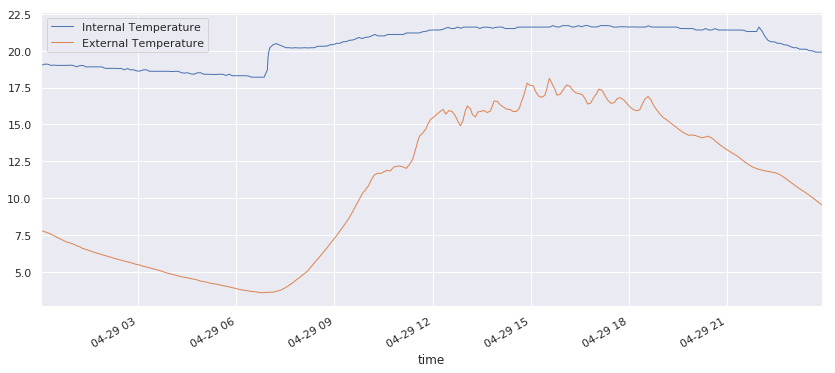

In [17]:
df1['Internal_Temp'].plot(linewidth=1)
df_one_day['External_Temp'].plot(linewidth=1)

plt.legend(['Internal Temperature', 'External Temperature'], ncol=1, loc='best');

plt.show()